# Supporting Notebook in CS1 2024

In this Notebook, we will look at a few simple systems, and qualitatively assess how different control strategies work on each one. 

## First-order model
Consider the system below, which roughly models the speed dynamics of an old-fashioned car, without cruise control or other modern speed control devices. 


## Open-loop, Feed-forward Control

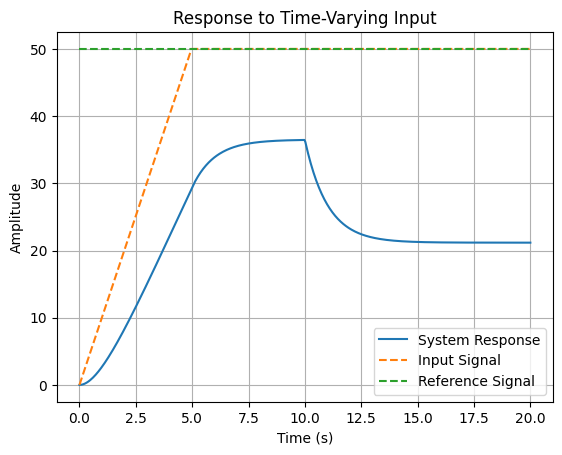

In [21]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# Define the transfer function
tf = ct.TransferFunction([0.73], [1, 1])

# Define a time vector
time = np.linspace(0, 20, 500)

# Define reference signal
reference_signal = 50 * np.ones_like(time)

# Define a time-varying input signal (e.g., sine wave)
control_signal = np.linspace(0,50,len(time))
control_signal[time <= 5] = np.linspace(0,50,125)
control_signal[time > 5] = 50


disturbance = np.zeros_like(time)
disturbance[time >= 10] = 10

disturbed_input = -2.1 * disturbance + np.clip(control_signal, -100, 100)

# Simulate the response of the system to the time-varying input
time, response = ct.forced_response(tf, T=time, U=disturbed_input)

# Plot the results
plt.figure()
plt.plot(time, response, label="System Response")
plt.plot(time, control_signal, label="Input Signal", linestyle='--')
plt.plot(time, reference_signal, label="Reference Signal", linestyle='--')
plt.title('Response to Time-Varying Input')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

### Closed-loop,feedback control


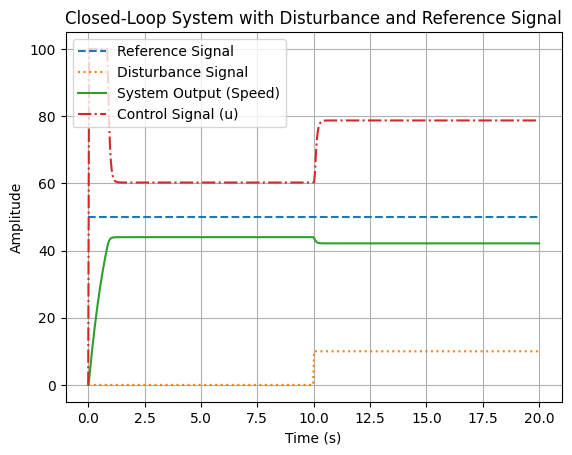

In [22]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# Define the transfer function of the system
tf = ct.TransferFunction([0.73], [1, 1])  # Transfer function G(s)

# Define feedback gain K
K = 10.0  # You can adjust this gain as needed

# Define time vector
time = np.linspace(0, 20, 500)

# Define reference signal
reference_signal = 50 * np.ones_like(time)

# Define disturbance signal (0 for time < 10, and 10 for time >= 10)
disturbance = np.zeros_like(time)
disturbance[time >= 10] = 10

# Initialize variables for simulation
response = np.zeros_like(time)  # System output (e.g., speed)
control_signal = np.zeros_like(time)  # Control signal

disturbed_u = np.zeros_like(time)  # Disturbed control signal

# Simulate the system response over time
for i in range(1, len(time)):
    # Calculate error (reference - current output)
    error = reference_signal[i] - response[i-1]
    
    # Compute control signal u based on the error
    control_signal[i] = np.clip(K * error, -100, 100)
    # print(control_signal[i])

    # Add disturbance and clip the control signal
    disturbed_u[i] = -2.1 * disturbance[i] + control_signal[i]

    # Simulate the system's response to this disturbed input
    # Use the transfer function and previous output
    # t, y = ct.forced_response(tf, T=[time[i-1], time[i]], U=[disturbed_u[i-1], disturbed_u[i]])
    t, y = ct.forced_response(tf, T=[time[:i+1]], U=[disturbed_u[:i+1]])

    # Update the system response at this time step
    response[i] = y[-1]

# Plot the results
plt.figure()
plt.plot(time, reference_signal, label="Reference Signal", linestyle="--")
plt.plot(time, disturbance, label="Disturbance Signal", linestyle=":")
plt.plot(time, response, label="System Output (Speed)")
plt.plot(time, control_signal, label="Control Signal (u)", linestyle="-.")
plt.title("Closed-Loop System with Disturbance and Reference Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

### Two-degrees-of-freedom Control



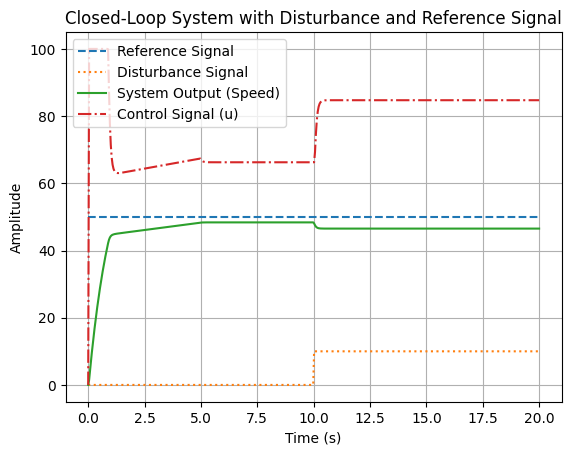

In [24]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# Define the transfer function of the system
tf = ct.TransferFunction([0.73], [1, 1])  # Transfer function G(s)

# Define feedback gain K
K = 10.0  # You can adjust this gain as needed

# Define time vector
time = np.linspace(0, 20, 500)

# Define reference signal
reference_signal = 50 * np.ones_like(time)

# Define disturbance signal (0 for time < 10, and 10 for time >= 10)
disturbance = np.zeros_like(time)
disturbance[time >= 10] = 10

# input_signal
input_signal = np.linspace(0,50,len(time))
input_signal[time <= 5] = np.linspace(0,50,125)
input_signal[time > 5] = 50

# Initialize variables for simulation
response = np.zeros_like(time)  # System output (e.g., speed)
control_signal = np.zeros_like(time)  # Control signal

disturbed_u = np.zeros_like(time)  # Disturbed control signal

# Simulate the system response over time
for i in range(1, len(time)):
    # Calculate error (reference - current output)
    error = reference_signal[i] - response[i-1]
    
    # Compute control signal u based on the error
    control_signal[i] = np.clip(K * error + input_signal[i], -100, 100)
    # print(control_signal[i])

    # Add disturbance and clip the control signal
    disturbed_u[i] = -2.1 * disturbance[i] + control_signal[i]

    # Simulate the system's response to this disturbed input
    # Use the transfer function and previous output
    t, y = ct.forced_response(tf, T=[time[:i+1]], U=[disturbed_u[:i+1]])

    # Update the system response at this time step
    response[i] = y[-1]

# Plot the results
plt.figure()
plt.plot(time, reference_signal, label="Reference Signal", linestyle="--")
plt.plot(time, disturbance, label="Disturbance Signal", linestyle=":")
plt.plot(time, response, label="System Output (Speed)")
plt.plot(time, control_signal, label="Control Signal (u)", linestyle="-.")
plt.title("Closed-Loop System with Disturbance and Reference Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

### Second-order system



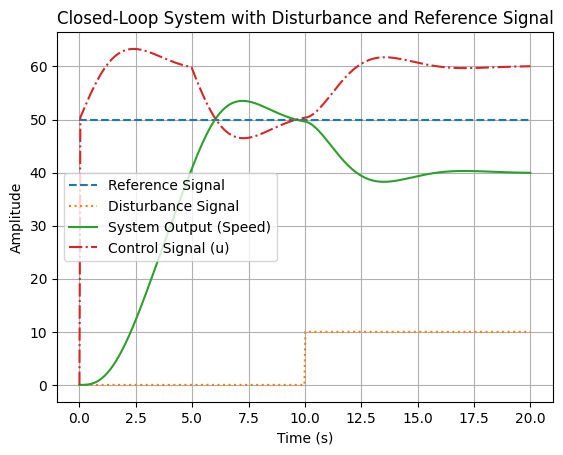

In [26]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# Define the transfer function of the system
tf = ct.TransferFunction([1], [1, 1, 0])  # Transfer function G(s)

# Define feedback gain K
K = 1.0  # You can adjust this gain as needed

# Define time vector
time = np.linspace(0, 20, 500)

# Define reference signal
reference_signal = 50 * np.ones_like(time)

# Define disturbance signal (0 for time < 10, and 10 for time >= 10)
disturbance = np.zeros_like(time)
disturbance[time >= 10] = 10

# input_signal
input_signal = np.linspace(0,50,len(time))
input_signal[time <= 5] = np.linspace(0,50,125)
input_signal[time > 5] = 50

# Initialize variables for simulation
response = np.zeros_like(time)  # System output (e.g., speed)
control_signal = np.zeros_like(time)  # Control signal

disturbed_u = np.zeros_like(time)  # Disturbed control signal

# Simulate the system response over time
for i in range(1, len(time)):
    # Calculate error (reference - current output)
    error = reference_signal[i] - response[i-1]
    
    # Compute control signal u based on the error
    control_signal[i] = np.clip(K * error + input_signal[i], -100, 100)
    # print(control_signal[i])

    # Add disturbance and clip the control signal
    disturbed_u[i] = -1* (50+disturbance[i]) + control_signal[i]

    # Simulate the system's response to this disturbed input
    # Use the transfer function and previous output
    t, y = ct.forced_response(tf, T=[time[:i+1]], U=[disturbed_u[:i+1]])

    # Update the system response at this time step
    response[i] = y[-1]

# Plot the results
plt.figure()
plt.plot(time, reference_signal, label="Reference Signal", linestyle="--")
plt.plot(time, disturbance, label="Disturbance Signal", linestyle=":")
plt.plot(time, response, label="System Output (Speed)")
plt.plot(time, control_signal, label="Control Signal (u)", linestyle="-.")
plt.title("Closed-Loop System with Disturbance and Reference Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

### Higher-order system

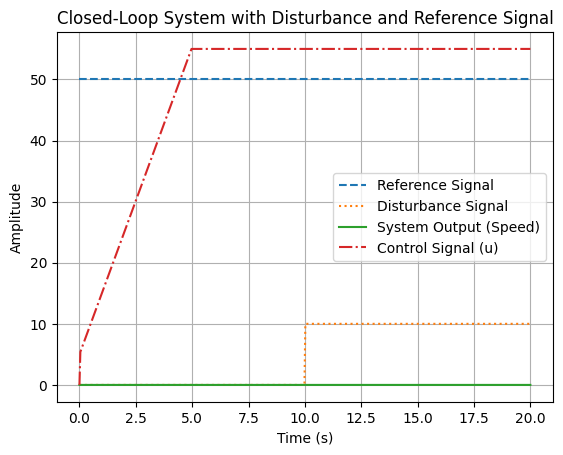

In [31]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# Define the transfer function of the system
tf = ct.TransferFunction([1], [1, 1, 0, 0])  # Transfer function G(s)

# Define feedback gain K
K = 0.1  # You can adjust this gain as needed

# Define time vector
time = np.linspace(0, 20, 500)

# Define reference signal
reference_signal = 50 * np.ones_like(time)

# Define disturbance signal (0 for time < 10, and 10 for time >= 10)
disturbance = np.zeros_like(time)
disturbance[time >= 10] = 10

# input_signal
input_signal = np.linspace(0,50,len(time))
input_signal[time <= 5] = np.linspace(0,50,125)
input_signal[time > 5] = 50

# Initialize variables for simulation
response = np.zeros_like(time)  # System output (e.g., speed)
control_signal = np.zeros_like(time)  # Control signal

disturbed_u = np.zeros_like(time)  # Disturbed control signal

# Simulate the system response over time
for i in range(1, len(time)):
    # Calculate error (reference - current output)
    error = reference_signal[i] - response[i-1]
    
    # Compute control signal u based on the error
    control_signal[i] = np.clip(K * error + input_signal[i], -100, 100)
    # print(control_signal[i])

    # Add disturbance and clip the control signal
    disturbed_u[i] = -1* (disturbance[i]) + control_signal[i]

    # Simulate the system's response to this disturbed input
    # Use the transfer function and previous output
    t, y = ct.forced_response(tf, T=[time[:i+1]], U=[disturbed_u[:i+1]])

    # Update the system response at this time step
    response[i] = y[-1]

# Plot the results
plt.figure()
plt.plot(time, reference_signal, label="Reference Signal", linestyle="--")
plt.plot(time, disturbance, label="Disturbance Signal", linestyle=":")
plt.plot(time, response, label="System Output (Speed)")
plt.plot(time, control_signal, label="Control Signal (u)", linestyle="-.")
plt.title("Closed-Loop System with Disturbance and Reference Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()